# Logistic Regression, Neural Networks

In the following, we consider a classification problem with two classes (_i.e._ binary classification problem), namely $C_1$ and $C_2$.

## Logistic Regression
Linear regression (regression problem):
$$y=\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_i x_k$$
Logistic regression (binary classification problem):
$$\mathbb{P}(C_1|X=x)=\text{sigmoïd}\left(\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_k x_k\right)=\frac{exp\left(\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_k x_k\right)}{1+exp\left(\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_k x_k\right)}$$

<img src="sigmoid.png" width="400">


The sigmoïd function maps $\mathbb{R}$ to $]0;1[$. In a classification context, this function is used to obtain a probability value from an ordinary real value. With the logistic regression, the sigmoïd maps the value given by a linear model to a probabilty.

<font color='red'>**Q1:**</font> Load the file "lab2.csv" in a data frame `df`. To do this, use the function `pd.read_csv(filename)`. Then, execute the `head()` method of `df` to see the first lines of the data frame. Then, plot the data with $x_1$ on the $x$-axis and $x_2$ on the $y$-axis. 

<font color='green'>**Hints for Q1:**</font> To plot the data, use the function `plt.scatter(x,y,c)` where `c` specifies the color of the points, followed by `plt.show()` to show the plot. Using the option `c=df.c`, the color of the points will depend on the variable "c".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.neural_network

import utilslab2

In [2]:
df = pd.read_csv("lab2.csv")
df.head()

,x1,x2,c
0,104.798639,108.772169,C1
1,105.658004,98.375060,C2
2,99.410973,93.085385,C1
3,96.442608,107.150154,C2
4,98.439695,97.055206,C2


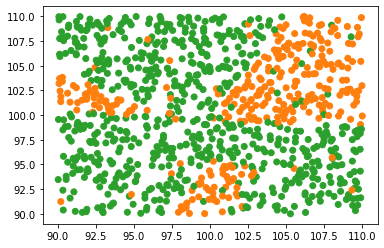

In [3]:
plt.scatter(df.x1, df.x2, c=df.c)
plt.show()

<font color='red'>**Q2:**</font> Using the function `fitlogistic(s)` below, fit a logistic regression model to the data `df`.

In [4]:
def fitlogistic(s):
    model = sklearn.linear_model.LogisticRegression(C=1e6, solver='lbfgs')
    model.fit(s[["x1","x2"]], s.c)
    return model

model = None # answer Q2 here by replacing None

In [5]:
model = fitlogistic(df)

<font color='red'>**Q3:**</font> Once the model is fitted, consider $p \in ]0;1[$, what is the locus (the shape) of the set of points $\lbrace(x_1,x_2)\in~{\mathbb{R}}^2|~\mathbb{P}(C_1|X=(x_1,x_2))=p\rbrace$? When $p=0.5$, this locus is called the _decision boundary_. This _decision boundary_ supposedly separates the two classes. Plot the _decision boundary_ of the fitted model `model` by calling `utilslab2.drawDecisionBoundary(model,df,colors=["blue"],linewidths=3)`.

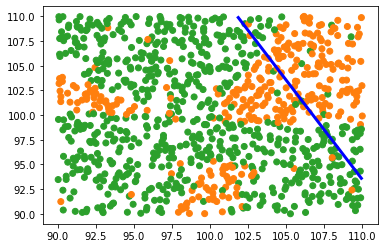

In [7]:
plt.scatter(df.x1, df.x2, c=df.c)
utilslab2.drawDecisionBoundary(model,df,colors=["blue"], linewidths=3)
plt.show()

<font color='red'>**Q4:**</font> If we consider a more general model: $\mathbb{P}(C_1|X=x)=\text{sigmoïd}(f(x))$, what is the equation of the _decision boundary_ ? In our data set, how many regions contain a lot of examples in $C_1$? Likewise, how many regions contain a lot of examples in $C_2$? Thus, is it possible to obtain a good prediction if we consider $f(x)=\gamma_0+\gamma_1~x_1+\gamma_2~x_2+\gamma_3~x_1*x_2+\gamma_4~{x_1}^2+\gamma_5~{x_2}^2$?

<font color='blue'>**A4:**</font> The decision boundary is $\left\lbrace x | f(x) = 0 \right\rbrace$.
3 regions contain C1 examples.
1 region contains C2 examples.
The decision boundary is $0=\gamma_0+\gamma_1~x_1+\gamma_2~x_2+\gamma_3~x_1*x_2+\gamma_4~{x_1}^2+\gamma_5~{x_2}^2$. It is 2D quadratic function. This function can at most separate 3 regions if for instance the quadratic function is hyperbolic.

## Neural Network with $n$ Units on 1 Hidden Layer
Neural network (regression problem):
$$y=\gamma_0+\sideset{}{_{k=1}^n}\sum  \gamma_k ~\text{sigmoïd}\left({\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i\right)$$
Neural network (binary classification problem):
$$\mathbb{P}(C_1|X=x)=f(\beta,\gamma;x)=\text{sigmoïd}\left(\gamma_0+\sideset{}{_{k=1}^n}\sum  \gamma_k ~\text{sigmoïd}\left({\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i\right)\right)$$


The outer sigmoïd is used to map a real value to a probability, as with the logistic regression. However, the inner sigmoïds are used in a different way. They are used to build new features. Each unit on the hidden layer builds one new feature.

If we look at the sigmoïd function, we have a linear part near zero. We have a curvilinear part at $\lvert x \rvert\simeq 2$ and if $\lvert x \rvert \geq 6$ the sigmoïd is almost constant. For a given set of examples, depending on the coefficients $\left({\beta}_{k,0},\ldots,{\beta}_{k,p}\right)$, the values ${\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i$ will be different, they can be close to each other or very widespread. If these are close to each other (see Figure a) then only one part of the sigmoïd will be used; it can be the linear or the constant part. If these values are widespread (see Figure b), the largest values will be flattened to 1 and the smallest values will be flattened to 0.

<img src="sigmoid2.png" width="1000">


<font color='red'>**Q5:**</font> A neural network model can be trained using the `sklearn.neural_network.MLPClassifier` class, see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). The number of hidden units is specified by the `nhidden` parameter. The regularization hyper-parameter is `alpha`. In order to obtain the $\beta$ and $\gamma$ parameters, an optimization algorithm is applied. Prior to this optimization, the standardization of the explanatory variables is done using `sklearn.preprocessing.StandardScaler` and `sklearn.pipeline.make_pipeline`. The code obtained is given below. Plot the _decision boundary_ using `utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)`. Re-run the training/plot command again and again. What do you observe? What happens if you deactivate the scaling using `return net` instead of `return model` ?


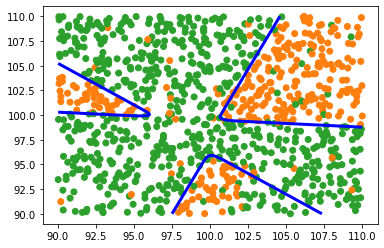

In [29]:
#np.random.seed(18)
def buildneuralnet(nhidden=3,alpha=1e-6):
    scale = sklearn.preprocessing.StandardScaler()
    hidden_layer_sizes = (nhidden,)
    net = sklearn.neural_network.MLPClassifier(hidden_layer_sizes,activation="logistic",verbose=True, solver='lbfgs',alpha=alpha, max_iter=1000)
    model = sklearn.pipeline.make_pipeline(scale, net)
    return model

nnet = buildneuralnet()
nnet.fit(df[["x1","x2"]], df.c)

plt.scatter(df.x1, df.x2, c=df.c)
utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)
plt.show()
#df

<font color='red'>**Q6:**</font> Let us consider the sets $F$ and $S$ defined as follow:
\begin{align*}
& F=\lbrace x\mapsto f(\beta,\gamma;x_1,\ldots,x_p)~|~\gamma\in~{\mathbb{R}}^{n+1},~\beta\in~{\mathbb{R}}^{n(p+1)}\rbrace \\
& S=\lbrace x\mapsto f\left(\beta,\gamma;l_1\left(x_1\right),\ldots,l_p\left(x_p\right)\right)~|~\gamma\in~{\mathbb{R}}^{n+1},~\beta\in~{\mathbb{R}}^{n(p+1)}\rbrace
\end{align*}
where $l_i$ are nonconstant linear functions.

How do the sets $F$ and $S$ compare? In order to standardize the explanatory variables, nonconstant linear functions $l_i$ are applied to the $x_i$'s. Why does the standardization help to obtain a good model?

<font color='red'>**Q7:**</font> Show that a neural network model can be seen as a logistic model in a space with new features $(\phi_1(x_1,\ldots,x_p),\ldots,\phi_n(x_1,\ldots,x_p))$, where the $\phi_i$ are functions that map ${\mathbb{R}}^p$ to $]0;1[$.

<font color='red'>**Q8:**</font> This space with new feature can be plotted when $n=3$. Use the function `utilslab2.drawPhiSpace(nnet,df)` to plot this space.

<font color='blue'>**A6:**</font> The sets are equal. The standardization helps to obtain a good model because it helps the optimization method. The choice of the initial weights are very important for the success of the optimization method used. If the weights are chosen without care, the weights can be in a flat part of the error function. These flat parts are a consequence of the behavior of the sigmoid function. If the optimization method relies on the local shape of the error function, being in the flat part is a bad thing. The flat part gives basically no information on where to go to minimize the error function. With the standardization, good initial weights can be drawn with a fixed distribution, independent from the data.

<font color='blue'>**A7:**</font> If we consider $\phi_k(x)=\text{sigmoïd}\left({\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i\right)$ then we have $P(C1|X=x)=\text{sigmoïd}\left(\beta_0+\sideset{}{_{i=1}^p}\sum  \beta_i \phi_i(x)\right)$.

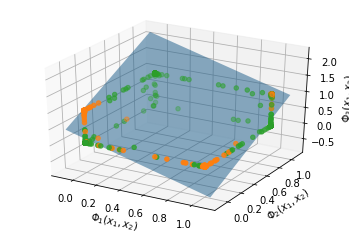

In [10]:
%matplotlib inline
utilslab2.drawPhiSpace(nnet,df)

<font color='red'>**Q9:**</font> If we have more than 3 units in the hidden layers (*i.e.* $n>3$) it is difficult to plot in the $(\phi_1(x_1,\ldots,x_p),\ldots,\phi_n(x_1,\ldots,x_p))$ space. However, to visualize the new features, you can call `utilslab2.drawNewFeaturesLine(nnet,df)`. For each feature $\Phi_k(x_1,\ldots,x_p)$, it plots the line $\beta_{k,0}+\sideset{}{_{i=1}^p}\sum  \beta_{k,i} x_i=-2$ in yellow, the line $\beta_{k,0}+\sideset{}{_{i=1}^p}\sum  \beta_{k,i} x_i=0$ in black and the line $\beta_{k,0}+\sideset{}{_{i=1}^p}\sum  \beta_{k,i} x_i=2$ in red. What is the value of the new feature $\phi_k(x_1,\ldots,x_p)$ for a point on the yellow line? What if this point is on the black line? What if this point is on the red line?

<font color='red'>**Q10:**</font> Use `utilslab2.drawNewFeaturesLine(nnet,df)` to plot these lines for $n=7$ and different values of decay like $1e0$, $1e-2$ and $1e-20$. What happens to the gap between the black/green/red lines when the decay decreases? Is it consistent with what you know about the purpose of the decay?

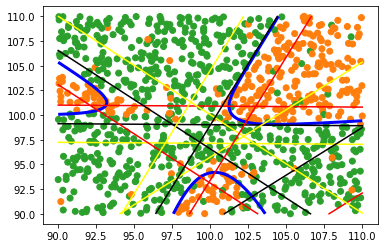

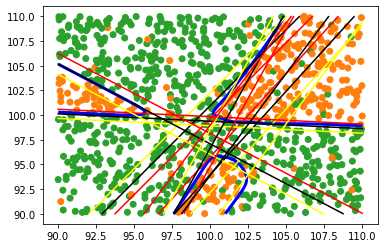

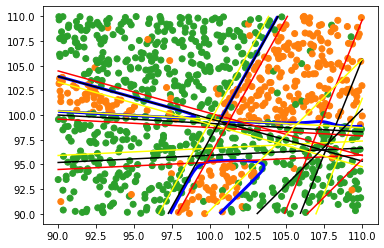

In [11]:
nnet = buildneuralnet(7,1)
nnet.fit(df[["x1","x2"]], df.c)
plt.scatter(df.x1, df.x2, c=df.c)
utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)
utilslab2.drawNewFeaturesLine(nnet,df)
plt.show()

nnet = buildneuralnet(7,1e-2)
nnet.fit(df[["x1","x2"]], df.c)
plt.scatter(df.x1, df.x2, c=df.c)
utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)
utilslab2.drawNewFeaturesLine(nnet,df)
plt.show()

nnet = buildneuralnet(7,1e-20)
nnet.fit(df[["x1","x2"]], df.c)
plt.scatter(df.x1, df.x2, c=df.c)
utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)
utilslab2.drawNewFeaturesLine(nnet,df)
plt.show()

## Model Selection and Assessment

As a reminder, a _confusion matrix_ can be useful to analyze the error made in classification:

<table class="wikitable" style="border:none; margin-top:0;">
<tbody><tr>
<th style="background:white; border:none;" colspan="2" rowspan="2">
</th>
<th colspan="3" style="background:none;">Actual class
</th></tr>
<tr>
<th>Positive
</th>
<th>Negative
</th></tr>
<tr>
<th rowspan="3" style="height:6em;"><div style="display: inline-block; -ms-transform: rotate(-90deg); -webkit-transform: rotate(-90deg); transform: rotate(-90deg);;">Predicted<br> class</div>
</th>
<th>Positive
</th>
<td>True Positive
</td>
<td>False Positive <br>(Type I error)
</td></tr>
<tr>
<th>Negative
</th>
<td>False Negative <br>(Type II error)
</td>
<td>True Negative
</td></tr>
</tbody></table>

In classification, one measure (among others) of the ''accuracy'' is the _accuracy_. It is defined as follows:
$$\text{accuracy}=\frac{\text{True Positive} + \text{True Negative}}{\text{All}}$$



<font color='red'>**Q11:**</font> Based on the output of ``df.c.describe()``, what would be the _accuracy_ of a model predicting that the class is always $C_1$? What would be the _accuracy_ if the model predicts always $C_2$?

In [12]:
print(df.c.describe())
#always C1:
print(np.mean(df.c=='C1'))
#always C2:
print(np.mean(df.c=='C2'))

count     1000
unique       2
top         C2
freq       684
Name: c, dtype: object
0.316
0.684


### Model Selection
<font color='red'>**Q12:**</font> One can use a cross-validation procedure to select the best hyper-parameter. With the code below, `clf.fit` performs two operations in the following order:
1. A 5-fold cross-validation is used to select the best hyper-parameter;
2. The model with the best hyper-parameter is fitted using the whole dataset.

Using `clf.cv_results_`:

- looking at the `'params'` field, which hyper-parameters were tested ?
- looking at the `'mean_test_score'` field, which hyper-parameter is the best ?


In [13]:
nnet = buildneuralnet()
parameters={'mlpclassifier__alpha':[1e-1,1],'mlpclassifier__hidden_layer_sizes':[(1,),(7,),(104,)]}
clf = sklearn.model_selection.GridSearchCV(nnet, parameters, cv=5, scoring = 'accuracy')
clf.fit(df[["x1","x2"]], df.c)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='logistic',
                                                      alpha=1e-06,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(3,),
                                                      learning_rate='const

In [14]:
print(clf.cv_results_['params'])
print(clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])])
# simpler: print(clf.best_estimator_)

[{'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (1,)}, {'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (7,)}, {'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (104,)}, {'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (1,)}, {'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (7,)}, {'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (104,)}]
{'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (104,)}


### Model Assessment
<font color='red'>**Q13:**</font>

We want to assess the performance of our model on unseen data.


One could think of using `clf.best_score_` as it is the score of the model with the best hyper-parameter obtained though a cross-validation. However, in this case, the same test data (the test folds as we are using a k-folds cross-validation) are used to select and evaluate the performance. Information of this test data might "leak" into the model, and we might overfit the test data without knowing it.

To avoid this potential issue, we can use  `sklearn.model_selection.cross_val_score(model,data)`. This function applies `model.fit` on the training folds of `data` and then use the trained model on the test folds of `data`. The computed scores are returned in a numpy array.

We have seen that `clf.fit` is a model that embbeds an hyper-parameter selection method that uses cross-validation. The cross-validation inside clf.fit is sometimes called the _inner_ cross-validation whereas the cross-validation of `cross_val_score` is called the _outer_ cross-validation. The whole process is called _nested_ cross-validation.

Using the code below:
- How many times `clf.fit` is called ?
- How many times a neural network is trained ?

In [15]:
scores = sklearn.model_selection.cross_val_score(clf, df[["x1","x2"]], df.c, cv=10)
scores

array([0.94, 0.95, 0.98, 0.94, 0.93, 0.9 , 0.92, 0.93, 0.96, 0.95])

<font color='blue'>**A13:**</font>
- 10 times
- 10 * (5 * "size of hyper-parameter space" +1) times. So here 10 * (5 * 6 + 1) times